In [1]:
from datetime import timedelta
from time import time

import pandas as pd
from qiskit import QuantumCircuit
from qiskit.circuit.library import (
    PauliFeatureMap,
    RealAmplitudes,
    n_local,
    z_feature_map,
    zz_feature_map,
)
from qiskit_algorithms.optimizers import Optimizer
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.optimizers import COBYLA, SPSA
from qiskit_machine_learning.utils import algorithm_globals
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from utils import RANDOM_SEED, ExperimentLogger, display_confussion_matrix, get_dataset

# Desarrolla una QNN

## Configuración y Preprocesado de Datos

En este notebook probamos diferentes configuraciones de QNNs para poder elegir la más óptima.

Al igual que siempre, fijamos la semilla de los números aleatorios para que los resultados sean reproducibles entre ejecuciones.

In [2]:
algorithm_globals.random_seed = RANDOM_SEED

### Preprocesado del dataset

Utilizamos una función `get_dataset` del módulo `utilis.py` que hemos definido. El funcionamiento de esta función es exactamente el mismo que el de la sección de preprocesado del notebook [practica final](practica_final.ipynb).

In [3]:
X_train, y_train, X_test, y_test = get_dataset()

## Definición de funciones auxiliares

Definimos las funciones auxiliares para entrenar el clasificador variacional (`VQC`) y para registrar y evaluar los resultados automáticamente. Esto nos permitirá generar una tabla comparativa al final.

In [4]:
def train_VQC(
    feature_map: QuantumCircuit,
    ansatz: QuantumCircuit,
    optimizer: Optimizer,
    seed: int = RANDOM_SEED,
) -> VQC:
    global X_train, y_train

    sampler = Sampler(seed=seed)

    vqc = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=LossLogger().log_loss,
        sampler=sampler,
    )

    start = time()
    vqc.fit(X_train, y_train.values)
    total_time = time() - start
    print(f"Tiempo total de entrenamiento: {timedelta(seconds=total_time)}")

    return vqc


class LossLogger:
    def __init__(self):
        self._iteration = 0

    def log_loss(self, weights, obj_func_eval):
        self._iteration += 1
        print(f"Iteración {self._iteration} - Loss: {obj_func_eval:.4f}")

In [5]:
experiment_logger = ExperimentLogger()

In [6]:
number_of_features = X_train.shape[1]

## Probar diferentes modelos

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:23:34.181282
--- Resultados para zz_feature_map + n_local(reps=3) + SPSA(20) ---
Train - Accuracy: 0.7238, Precision: 0.7554
Test  - Accuracy: 0.7200, Precision: 0.7805


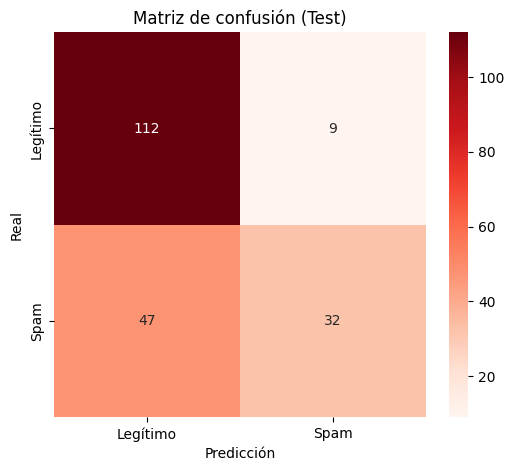

None

In [7]:
fmap_name = "z_feature_map"
ansatz_name = "n_local(reps=3)"
opt_name = "SPSA(20)"

feature_map = z_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


Tiempo total de entrenamiento: 0:23:34.181282
--- Resultados para zz_feature_map + n_local(reps=3) + SPSA(20) ---
Train - Accuracy: 0.7238, Precision: 0.7554
Test  - Accuracy: 0.7200, Precision: 0.7805


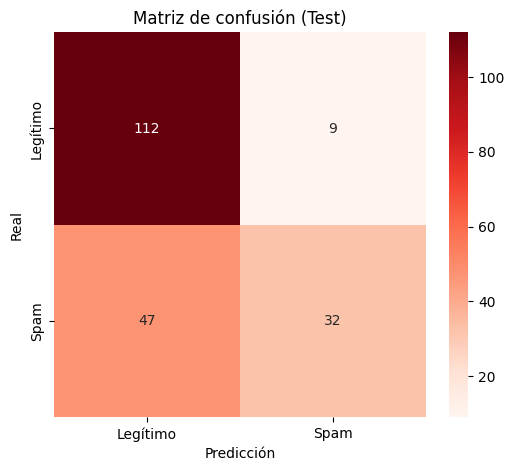

None

In [7]:
fmap_name = "zz_feature_map"
ansatz_name = "n_local(reps=3)"
opt_name = "SPSA(20)"

feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=3)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

In [ ]:
fmap_name = "zz_feature_map"
ansatz_name = "n_local(reps=4)"
opt_name = "SPSA(20)"

feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear", reps=4)
optimizer = SPSA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [ ]:
fmap_name = "zz_feature_map"
ansatz_name = "n_local()"
opt_name = "SPSA(40)"

feature_map = zz_feature_map(number_of_features)
ansatz = n_local(number_of_features, "ry", "cx", "linear")
optimizer = SPSA(maxiter=40)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


In [ ]:
fmap_name = "zz_feature_map"
ansatz_name = "RealAmplitudes"
opt_name = "COBYLA(20)"

feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(
    num_qubits=number_of_features, entanglement="linear"
).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

In [ ]:
fmap_name = "z_feature_map"
ansatz_name = "RealAmplitudes"
opt_name = "COBYLA(20)"

feature_map = z_feature_map(number_of_features)
ansatz = RealAmplitudes(
    num_qubits=number_of_features, entanglement="linear"
).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

In [ ]:
fmap_name = "zz_feature_map"
ansatz_name = "RealAmplitudes"
opt_name = "COBYLA(20)"

feature_map = zz_feature_map(number_of_features)
ansatz = RealAmplitudes(
    num_qubits=number_of_features, entanglement="linear"
).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

In [ ]:
fmap_name = "PauliFeatureMap"
ansatz_name = "RealAmplitudes"
opt_name = "COBYLA(20)"

feature_map = PauliFeatureMap(number_of_features).decompose()
ansatz = RealAmplitudes(
    num_qubits=number_of_features, entanglement="linear"
).decompose()
optimizer = COBYLA(maxiter=20)

vqc = train_VQC(feature_map, ansatz, optimizer)
experiment_logger.log(
    fmap_name, ansatz_name, opt_name, vqc, X_train, y_train, X_test, y_test
)

## Resumen de Resultados Finales

Destacar que hemos realizado más pruebas con diferentes feature maps, ansatzs y optimizadores; sin embargo, por claridad, nos hemos quedado con los resultados más interesantes para comentar.

In [ ]:
display(experiment_logger.results_df)

Primero de todo, destaca que aquellos casos en los que utilizamos el `z_feature_map`, los modelos tienden a clasificar todo como negativo (correo lícito).